In [59]:
# вариант
(ord('И') * ord('Д')) % 11

8

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.impute import SimpleImputer

## 1. Описание набора

Инфаркт миокарда — одна из самых сложных проблем современной медицины. Острый инфаркт миокарда связан с высокой смертностью в первый год после него. Заболеваемость инфарктом миокарда остаётся высокой во всех странах. Это особенно актуально для городского населения высокоразвитых стран, которое подвержено хроническим стрессовым факторам, нерегулярному и не всегда сбалансированному питанию. В США, например, более миллиона человек ежегодно страдают от инфаркта миокарда, и 200–300 тысяч из них умирают от острого инфаркта миокарда до прибытия в больницу.

1700 строк, 124 столбцов.

Целевые показатели (бинарные - 0, 1):
- FIBR_PREDS (Фибрилляция предсердий), 
- PREDS_TAH (Наджелудочковая тахикардия), 
- JELUD_TAH (Желудочковая тахикардия),
- FIBR_JELUD (Фибрилляция желудочков),
- A_V_BLOK (AV-блокада третьей степени),
- OTEK_LANC (Отек легких),
- RAZRIV (Разрыв миокарда),
- DRESSLER (Синдром Дресслера),
- ZSN (Хроническая сердечная недостаточность),
- REC_IM (Рецидив инфаркта миокарда),
- P_IM_STEN (Постинфарктная стенокардия),

(категореальный - (причина) 0: неизвестно (жив) 1: кардиогенный шок 2: отёк лёгких 3: разрыв миокарда 4: прогрессирующая застойная сердечная недостаточность 5: тромбоэмболия 6: асистолия 7: фибрилляция желудочков)
- LET_IS (Летальный исход).

In [61]:
data = pd.read_csv("MI.csv")
data

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


## 2. Дерево решений

### a. Построение полного дерева решений

In [100]:
X = data.iloc[:, 1:112]  # признаки
y = data.iloc[:, 123] # целевая переменная

# разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
# построение полного дерева без ограничений
clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X_train, y_train)          # обучение
y_pred_full = clf_full.predict(X_test)  # предсказание

# оценка качества модели
accuracy_full = accuracy_score(y_test, y_pred_full)
print(f"Точность полного дерева = {accuracy_full:.4f}")

Точность полного дерева = 0.8314


In [64]:
# матрица количества правильно и ошибочно угаданных классов
matrix = confusion_matrix(y_test, clf_full.predict(X_test))
matrix

array([[404,   5,   3,   9,   0,   1,   4,   0],
       [  7,  18,   1,   4,   0,   0,   3,   1],
       [  1,   1,   0,   0,   0,   1,   0,   0],
       [  9,   3,   1,   1,   1,   0,   0,   1],
       [  6,   1,   0,   0,   1,   0,   0,   1],
       [  4,   0,   0,   0,   0,   0,   0,   0],
       [  3,   2,   0,   0,   0,   1,   0,   1],
       [  6,   1,   1,   2,   0,   1,   0,   0]], dtype=int64)

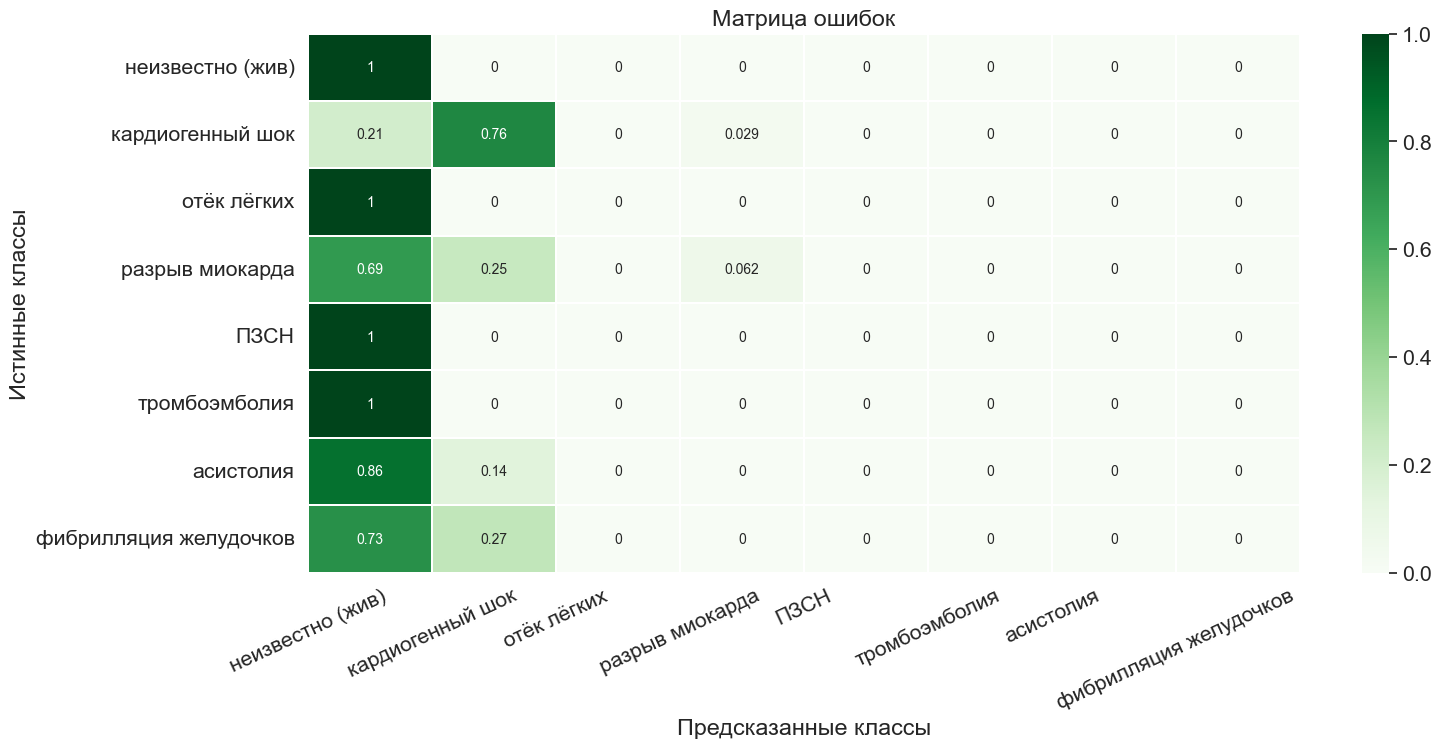

In [103]:
# та же матрица в процентах
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10}, cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['неизвестно (жив)', 'кардиогенный шок', 'отёк лёгких', 'разрыв миокарда', 'ПЗСН', 'тромбоэмболия', 'асистолия', 'фибрилляция желудочков'] 
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок')
plt.show()

# Сброс всех настроек
plt.rcdefaults()

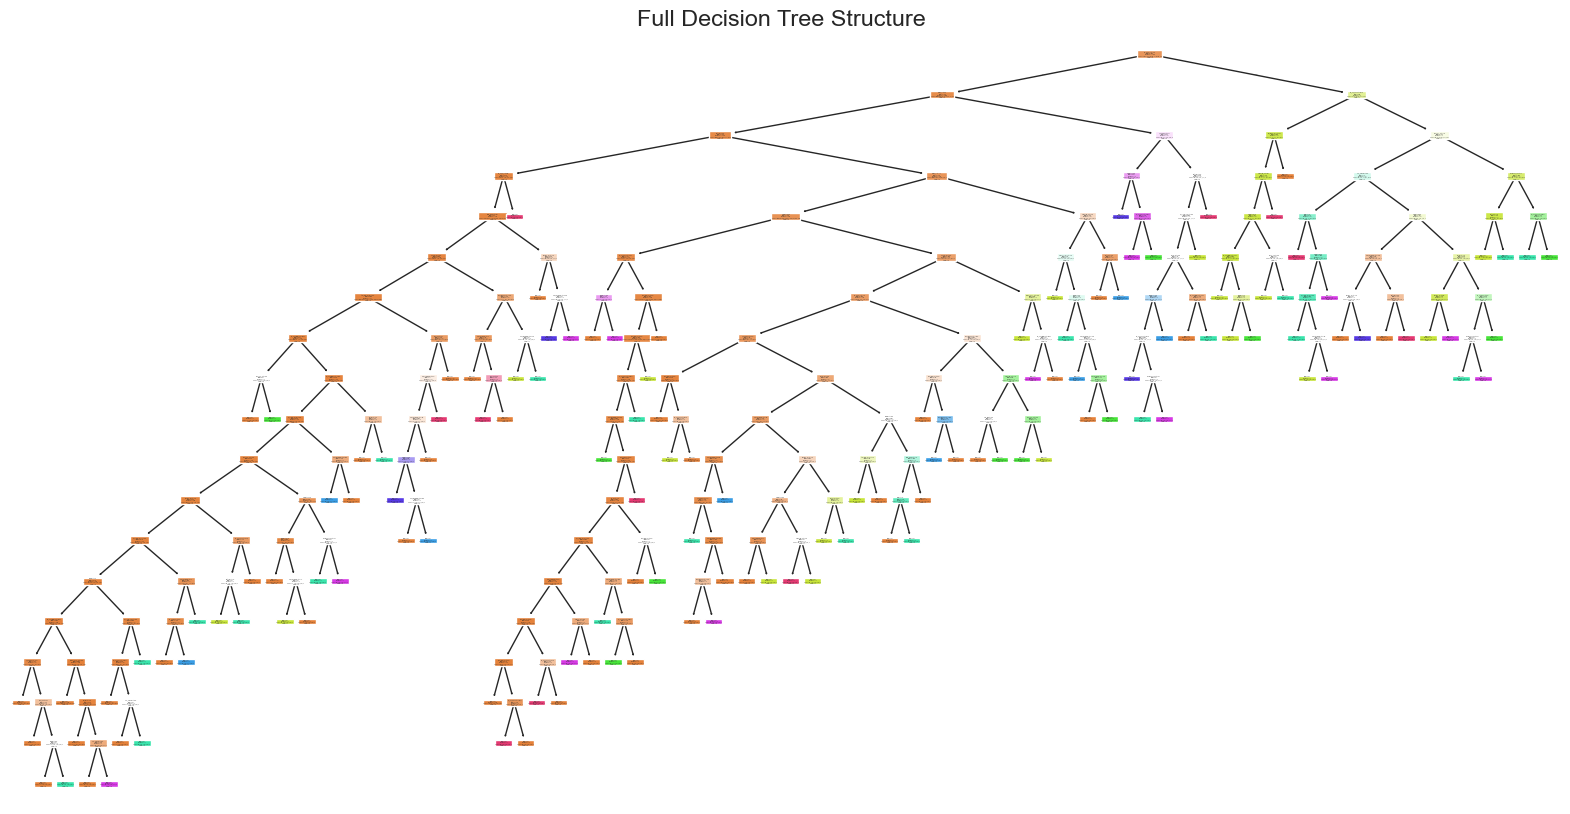

In [66]:
# Визуализация полного дерева решений
plt.figure(figsize=(20, 10))
plot_tree(clf_full, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str))
plt.title("Full Decision Tree Structure ")
plt.show()

### b. Исследование влияния гиперпараметров

In [67]:
# Варьируем глубину дерева
print("Влияние max_depth:")
for max_depth in [2, 3, 5, 6, 7, 10, None]:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)       # обучение
    y_pred = clf.predict(X_test)    # прогнозирование
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Max Depth: {max_depth}, Accuracy: {accuracy:.4f}")

Влияние max_depth:
Max Depth: 2, Accuracy: 0.8882
Max Depth: 3, Accuracy: 0.8706
Max Depth: 5, Accuracy: 0.8804
Max Depth: 6, Accuracy: 0.8647
Max Depth: 7, Accuracy: 0.8706
Max Depth: 10, Accuracy: 0.8529
Max Depth: None, Accuracy: 0.8314


Менее глубокие деревья могут лучше подстраиваться под обучающие данные, но это может привести к переобучению.

In [68]:
# Варьируем минимальное число объектов в узле
print("Влияние min_samples_split:")
for min_samples_split in [i for i in range(2, 20, 2)]:
    clf = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=42)
    clf.fit(X_train, y_train)       # обучение
    y_pred = clf.predict(X_test)    # прогнозирование
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Min Samples Split: {min_samples_split}, Accuracy: {accuracy:.4f}")

Влияние min_samples_split:
Min Samples Split: 2, Accuracy: 0.8314
Min Samples Split: 4, Accuracy: 0.8451
Min Samples Split: 6, Accuracy: 0.8314
Min Samples Split: 8, Accuracy: 0.8392
Min Samples Split: 10, Accuracy: 0.8549
Min Samples Split: 12, Accuracy: 0.8510
Min Samples Split: 14, Accuracy: 0.8784
Min Samples Split: 16, Accuracy: 0.8725
Min Samples Split: 18, Accuracy: 0.8745


Увеличение этого значения может уменьшить переобучение.

In [69]:
# Варьируем минимальное число объектов в листе
print("Влияние min_samples_leaf:")
for min_samples_leaf in [i for i in range(2, 20, 2)]:
    clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    clf.fit(X_train, y_train)       # обучение
    y_pred = clf.predict(X_test)    # прогнозирование
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Min Samples Leaf: {min_samples_leaf}, Accuracy: {accuracy:.4f}")

Влияние min_samples_leaf:
Min Samples Leaf: 2, Accuracy: 0.8490
Min Samples Leaf: 4, Accuracy: 0.8588
Min Samples Leaf: 6, Accuracy: 0.8647
Min Samples Leaf: 8, Accuracy: 0.8725
Min Samples Leaf: 10, Accuracy: 0.8843
Min Samples Leaf: 12, Accuracy: 0.8843
Min Samples Leaf: 14, Accuracy: 0.8843
Min Samples Leaf: 16, Accuracy: 0.8843
Min Samples Leaf: 18, Accuracy: 0.8745


Более высокие значения могут сделать модель более обобщенной.

### c. Построение модели DecisionTreeClassifier 

In [96]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=10, random_state=42)
clf.fit(X_train, y_train)  # обучение
y_pred_full = clf.predict(X_test) # предсказание

# оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность полного дерева = {accuracy:.4f}")

Точность полного дерева = 0.8765


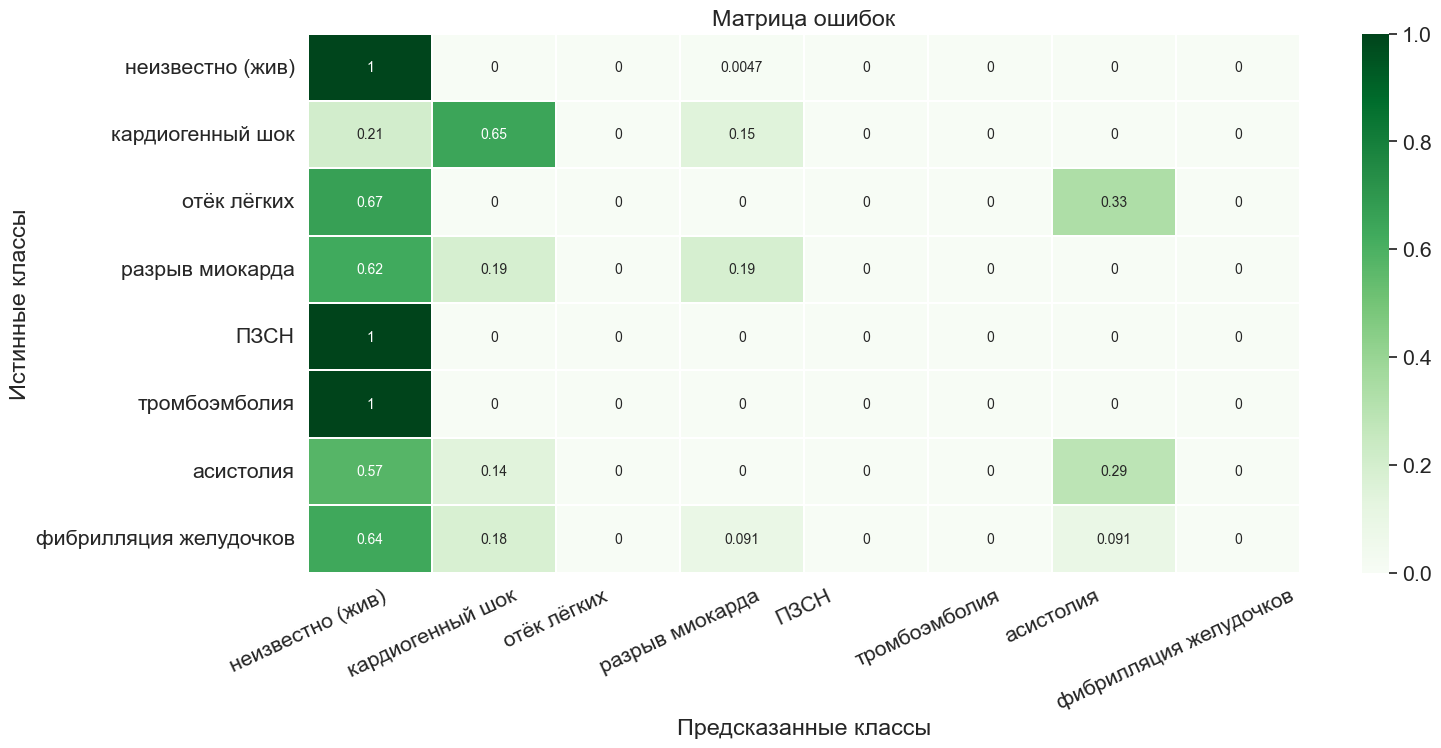

In [97]:
# матрица количества правильно и ошибочно угаданных классов
matrix = confusion_matrix(y_test, clf.predict(X_test))
# та же матрица в процентах
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10}, cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['неизвестно (жив)', 'кардиогенный шок', 'отёк лёгких', 'разрыв миокарда', 'ПЗСН', 'тромбоэмболия', 'асистолия', 'фибрилляция желудочков'] 
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок')
plt.show()

# Сброс всех настроек
plt.rcdefaults()

## 3. Структура дерева решений

### a. Визуализация 

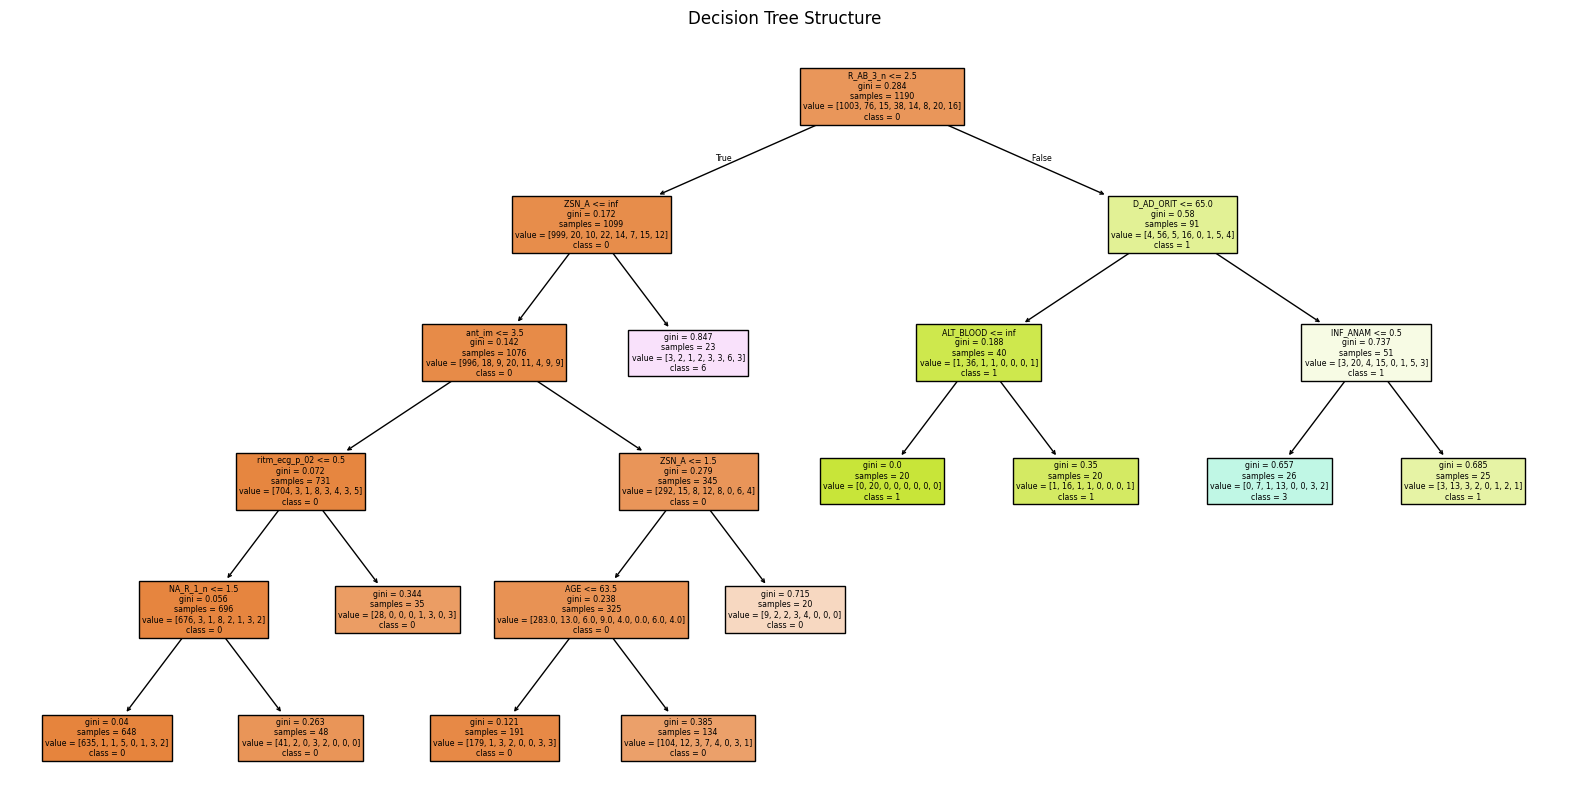

In [72]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str))
plt.title("Decision Tree Structure")
plt.show()

### b. Показатели, участвующие в структуре дерева

In [73]:
root_feature = clf.feature_importances_.argmax()
root_feature_name = X.columns[root_feature]
print(f"Корневой показатель: {root_feature_name}")

# Получение важности признаков
feature_importances = clf.feature_importances_

# Создание DataFrame для отображения важности признаков
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

features_df = features_df[features_df['Importance']>0]
print(features_df)

Корневой показатель: R_AB_3_n
          Feature  Importance
93       R_AB_3_n    0.692821
10          ZSN_A    0.155719
36      D_AD_ORIT    0.056285
43         ant_im    0.028624
2        INF_ANAM    0.024505
0             AGE    0.020513
49  ritm_ecg_p_02    0.010688
98       NA_R_1_n    0.007211
85      ALT_BLOOD    0.003634


- R_AB_3_n        - рецидив боли на третий день госпитализации,
- ZSN_A           - наличие хронической сердечной недостаточности (СН) в анамнезе,
- D_AD_ORIT       - диастолическое артериальное давление в отделении интенсивной терапии,
- NA_R_1_n        - использование опиоидных препаратов в отделении интенсивной терапии в первые часы госпитализации,
- INF_ANAM        - количество инфарктов миокарда в анамнезе,
- NA_KB           - использование опиоидных препаратов бригадой неотложной кардиологической помощи,
- ant_im          - наличие переднего инфаркта миокарда (левого желудочка) (изменения ЭКГ в отведениях V1: V4),
- NA_BLOOD        - содержание натрия в сыворотке,
- TIME_B_S        - время, прошедшее с начала приступа ИБС до госпитализации,
- ritm_ecg_p_02   - ритм ЭКГ на момент поступления в больницу: фибрилляция предсердий,
- IM_PG_P         - наличие инфаркта миокарда правого желудочка,
- K_SH_POST       - кардиогенный шок на момент поступления в отделение интенсивной терапии,
- np_09           - неполный RBBB в анамнезе.

<Axes: title={'center': 'Feature importances'}, xlabel='Feature', ylabel='Importance'>

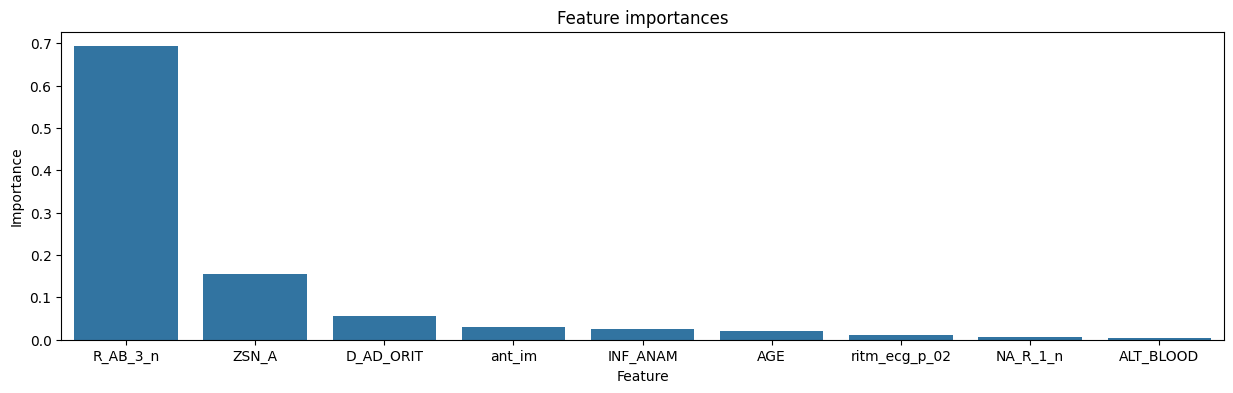

In [74]:
plt.figure(figsize=(15, 4))
plt.title("Feature importances")
sns.barplot(x = "Feature", y="Importance", data = features_df)

### c. Построение диаграммы для корневого показателя

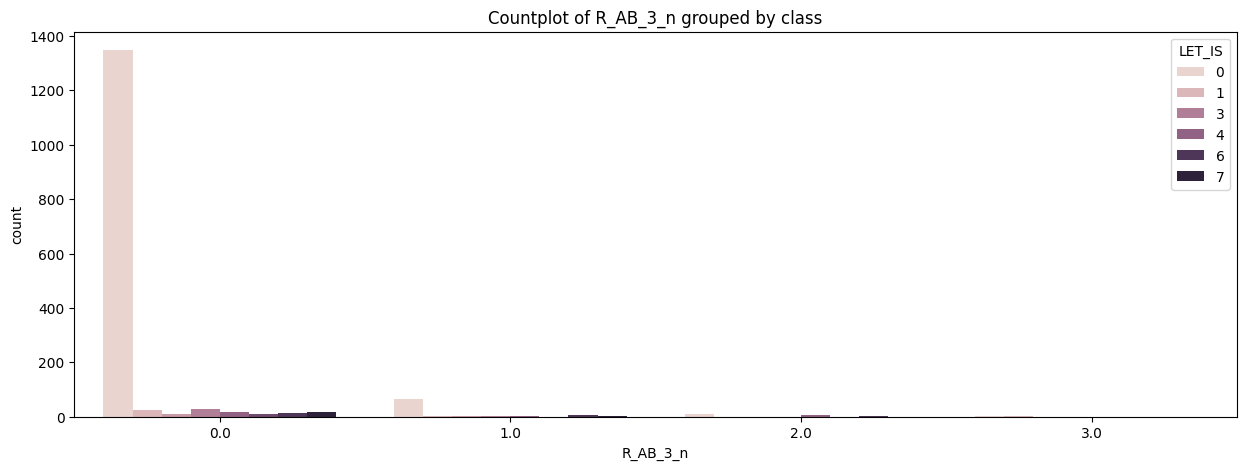

In [75]:
plt.figure(figsize=(15, 5))
sns.countplot(x=root_feature_name, hue='LET_IS', data=data)
plt.title(f"Countplot of {root_feature_name} grouped by class")
plt.show()

Большинство людей, у которых не было рецидива боли на третий день госпитализации или был зафиксирован один раз, живы.

### d. Эксперимент с исключением корневого показателя

In [76]:
# Исключение корневого показателя из признаков
X_reduced = X.drop(columns=[root_feature_name])

# Разделение данных на обучающую и тестовую выборки
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

Точность без R_AB_3_n: 0.8784


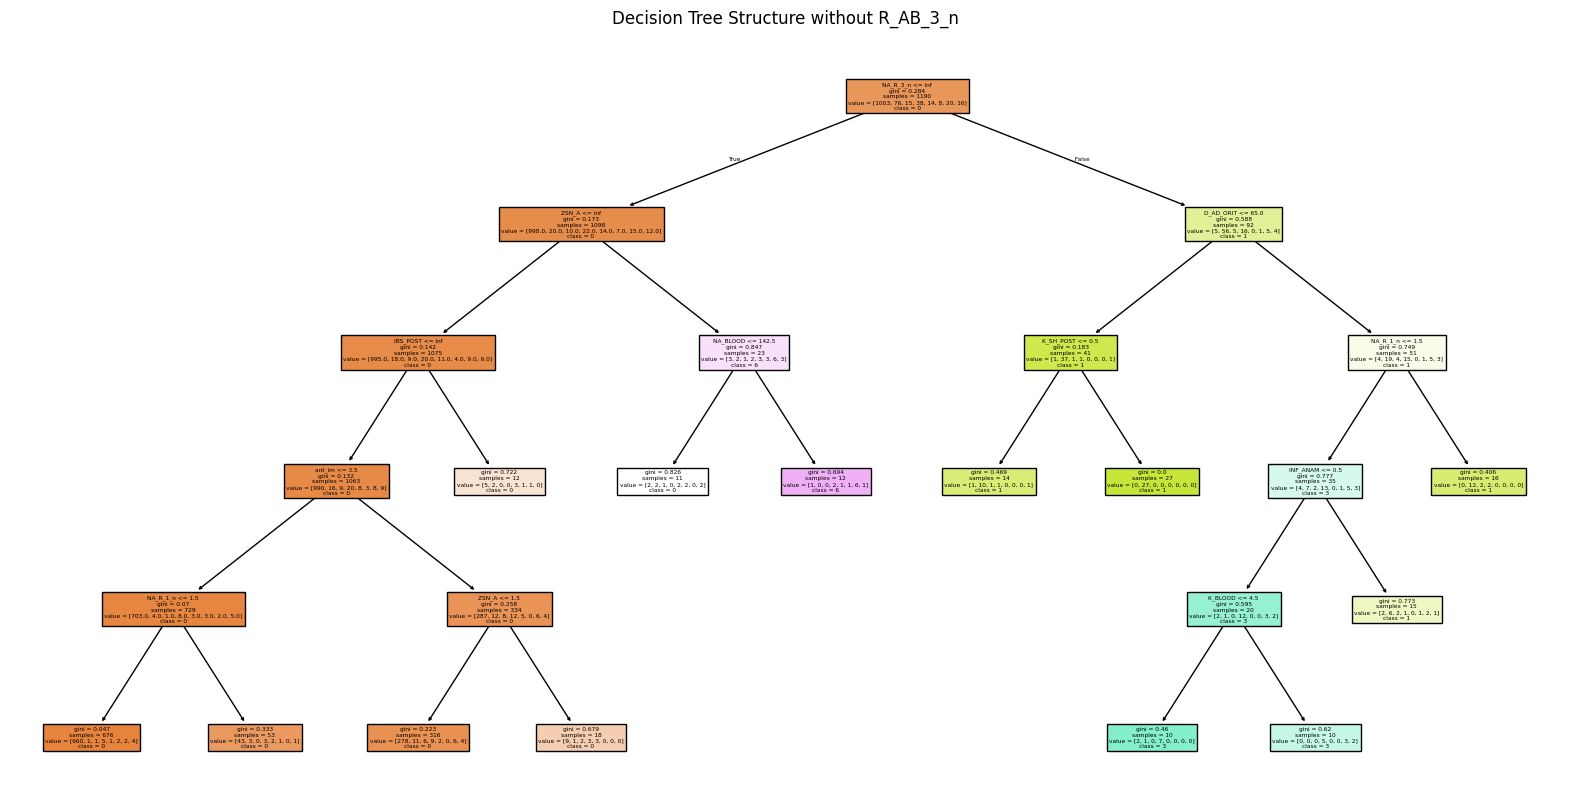

In [77]:
# Обучение модели без корневого показателя
clf_reduced = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
clf_reduced.fit(X_train_reduced, y_train_reduced)

# Прогнозирование на тестовой выборке
y_pred_reduced = clf_reduced.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test_reduced, y_pred_reduced)
print(f"Точность без {root_feature_name}: {accuracy_reduced:.4f}")

# Визуализация нового дерева решений
plt.figure(figsize=(20, 10))
plot_tree(clf_reduced, filled=True, feature_names=X_reduced.columns, class_names=np.unique(y).astype(str))
plt.title("Decision Tree Structure without " + root_feature_name)
plt.show()


При тех же параметрах, точность немного уменьшилась, как и число узлов.

In [78]:
root_feature_reduced = clf_reduced.feature_importances_.argmax()
root_feature_name_reduced = X.columns[root_feature_reduced]
print(f"Корневой показатель: {root_feature_name_reduced}")

columns_reduced = X.columns.drop('R_AB_3_n')

# Получение важности признаков
feature_importances_reduced = clf_reduced.feature_importances_

# Создание DataFrame для отображения важности признаков
features_df = pd.DataFrame({
    'Feature': columns_reduced,
    'Importance': feature_importances_reduced
}).sort_values(by='Importance', ascending=False)

print(features_df[:10])

Корневой показатель: NA_R_2_n
      Feature  Importance
99   NA_R_3_n    0.652473
10      ZSN_A    0.141007
36  D_AD_ORIT    0.058447
97   NA_R_1_n    0.042946
5    IBS_POST    0.029594
2    INF_ANAM    0.025677
43     ant_im    0.021440
84   NA_BLOOD    0.014254
82    K_BLOOD    0.007634
38  K_SH_POST    0.006529


NA_R_2_n - использование опиоидных препаратов в отделении интенсивной терапии на второй день госпитализации.

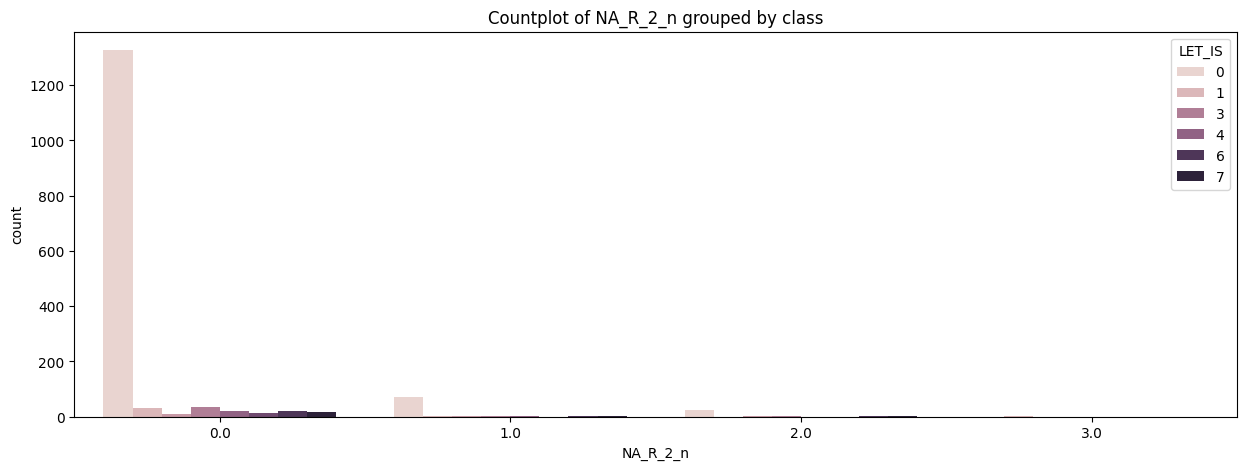

In [79]:
plt.figure(figsize=(15, 5))
sns.countplot(x=root_feature_name_reduced, hue='LET_IS', data=data)
plt.title(f"Countplot of {root_feature_name_reduced} grouped by class")
plt.show()

Большинство из тех, кто принимал опиоидные препараты в отделении интенсивной терапии на второй день госпитализации один или ноль раз, живы.

## 4. Модель RandomForest

### a. Построение Random Forest с параметрами по умолчанию

In [101]:
# Создание и обучение модели случайного леса
rf_clf = RandomForestClassifier(random_state=42)

# Преобразование y в одномерный массив
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

rf_clf.fit(X_train, y_train)

# Оценка качества модели
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность Random Forest с параметрами по умолчанию: {accuracy:.4f}")


Точность Random Forest с параметрами по умолчанию: 0.8882


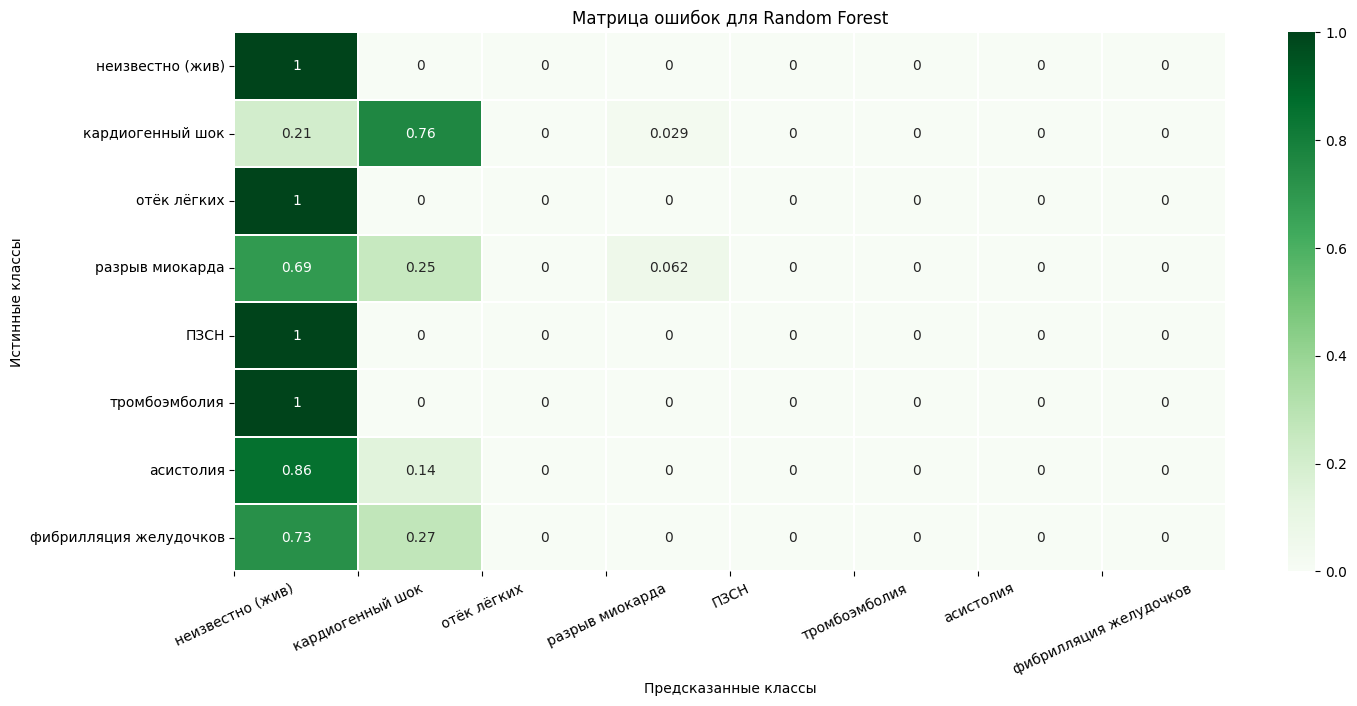

In [102]:
# матрица количества правильно и ошибочно угаданных классов
matrix = confusion_matrix(y_test, rf_clf.predict(X_test))
# та же матрица в процентах
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.heatmap(matrix, annot=True, annot_kws={'size':10}, cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['неизвестно (жив)', 'кардиогенный шок', 'отёк лёгких', 'разрыв миокарда', 'ПЗСН', 'тромбоэмболия', 'асистолия', 'фибрилляция желудочков']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок для Random Forest')
plt.show()
# Сброс всех настроек
plt.rcdefaults()

### b. Исследование влияния гиперпараметров

#### 1. Влияние количества деревьев (n_estimators)

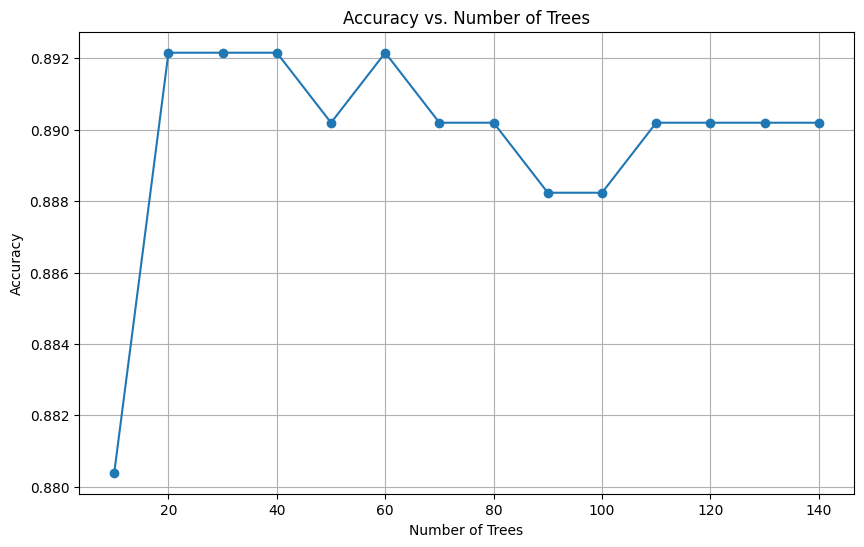

In [82]:
accuracies = []
n_estimators_range = [i for i in range (10, 150, 10)]

for n in n_estimators_range:
    clf_rf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf_rf.fit(X_train, y_train)
    y_pred = clf_rf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Построение графика зависимости точности от количества деревьев
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies, marker='o')
plt.title("Accuracy vs. Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

#### 2. Влияние количества признаков (max_features)

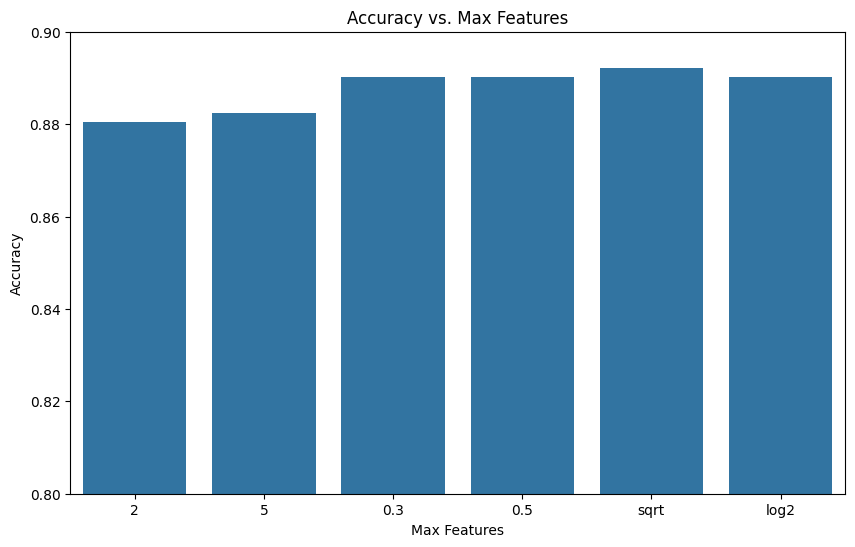

In [83]:
max_features_range = [2, 5, 0.3, 0.5, 'sqrt', 'log2', None]
accuracies = []

for mf in max_features_range:
    clf_rf = RandomForestClassifier(n_estimators=20, max_features=mf, random_state=42)
    clf_rf.fit(X_train, y_train)
    y_pred = clf_rf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Построение графика зависимости точности от числа отбираемых признаков
plt.figure(figsize=(10, 6))
sns.barplot(x=max_features_range, y=accuracies)
plt.title("Accuracy vs. Max Features")
plt.xlabel("Max Features")
plt.ylabel("Accuracy")
plt.ylim(0.8, 0.9)
plt.show()

Точнее всего модель работает, когда на каждом шаге разделяющий показатель выбирается из ограниченного списка случайно отобранных показателей m = SQRT(M).

#### 3. Влияние глубины деревьев (max_depth)

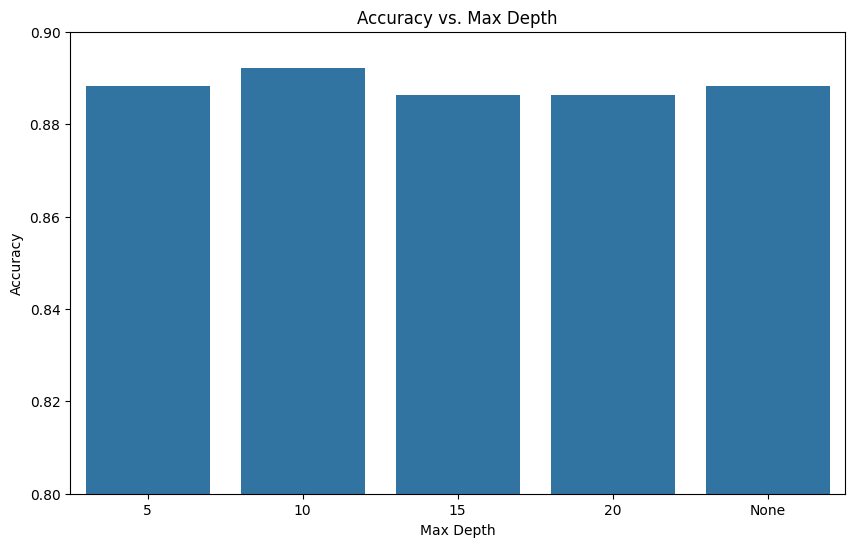

In [84]:
max_depth_range = [5, 10, 15, 20, None]
accuracies = []

for depth in max_depth_range:
    clf_rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    clf_rf.fit(X_train, y_train)
    y_pred = clf_rf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Построение графика зависимости точности от глубины деревьев
plt.figure(figsize=(10, 6))
sns.barplot(x=[str(d) for d in max_depth_range], y=accuracies)
plt.title("Accuracy vs. Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.ylim(0.8, 0.9)
plt.show()

Больше всего точность при максимально глубине деревьев - 10 уровней. Дальше модель начинает переобучаться.

### c. Визуализация структуры отдельных деревьев

0.8921568627450981


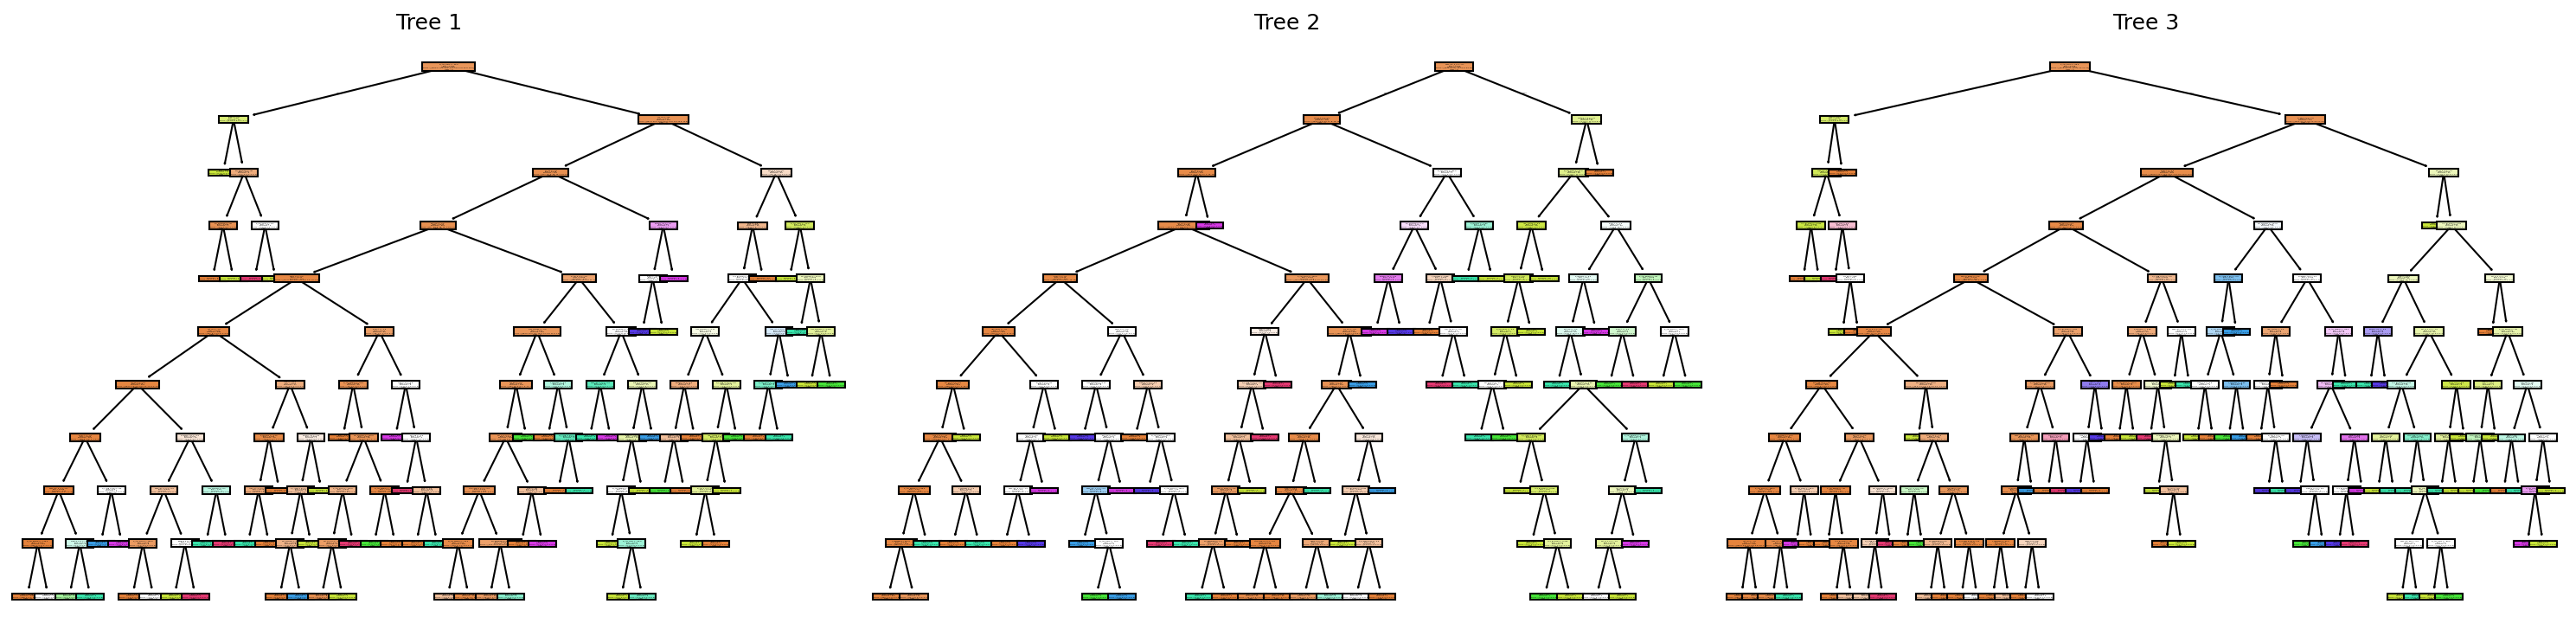

In [85]:
clf_rf = RandomForestClassifier(n_estimators=60, max_depth=10, max_features="sqrt", random_state=42)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
print(accuracy_score(y_test, y_pred))

# Выбор трех деревьев из случайного леса
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), dpi=150)

for i in range(3):
    tree = clf_rf.estimators_[i]
    plot_tree(tree, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str), ax=axes[i])
    axes[i].set_title(f"Tree {i+1}")

plt.tight_layout()
plt.show()

## 5. Структура Random Forest

### a. Показатели, участвующие в структуре Случайного леса

In [86]:
root_feature = clf_rf.feature_importances_.argmax()
root_feature_name = X.columns[root_feature]
print(f"Корневой показатель: {root_feature_name}")

# Получение важности признаков
feature_importances = clf_rf.feature_importances_

# Создание DataFrame для отображения важности признаков
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

features_df = features_df[features_df['Importance']>0]
print(features_df)

Корневой показатель: NA_R_3_n
          Feature  Importance
100      NA_R_3_n    0.063650
103    NOT_NA_3_n    0.062522
102    NOT_NA_2_n    0.062329
93       R_AB_3_n    0.056695
99       NA_R_2_n    0.051299
..            ...         ...
78    fibr_ter_06    0.000245
32     zab_leg_06    0.000124
31     zab_leg_04    0.000122
77    fibr_ter_05    0.000026
63   n_p_ecg_p_01    0.000009

[99 rows x 2 columns]


Почти все показатели были важны в построении случайного леса

### b. Построение диаграмм для трёх самых важных показателей

- NA_R_3_n - использование опиоидных препаратов в отделении интенсивной терапии на третий день госпитализации,
- NOT_NA_3_n - использование НПВП в отделении интенсивной терапии на третий день госпитализации,
- NOT_NA_2_n - использование НПВП в отделении интенсивной терапии на второй день госпитализации.

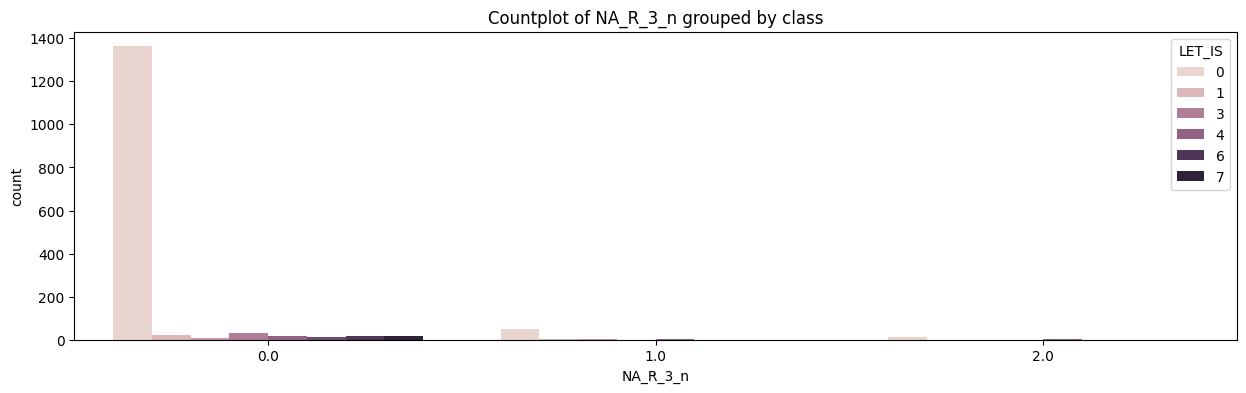

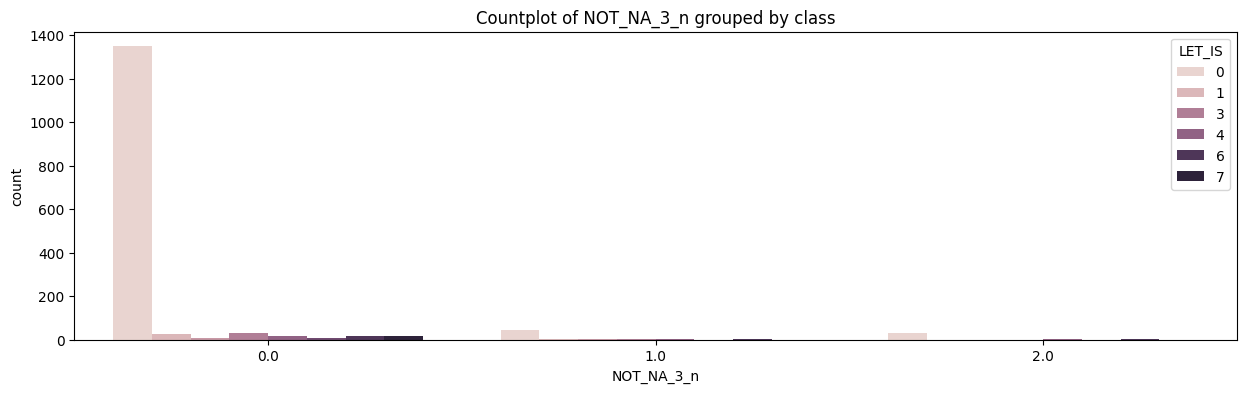

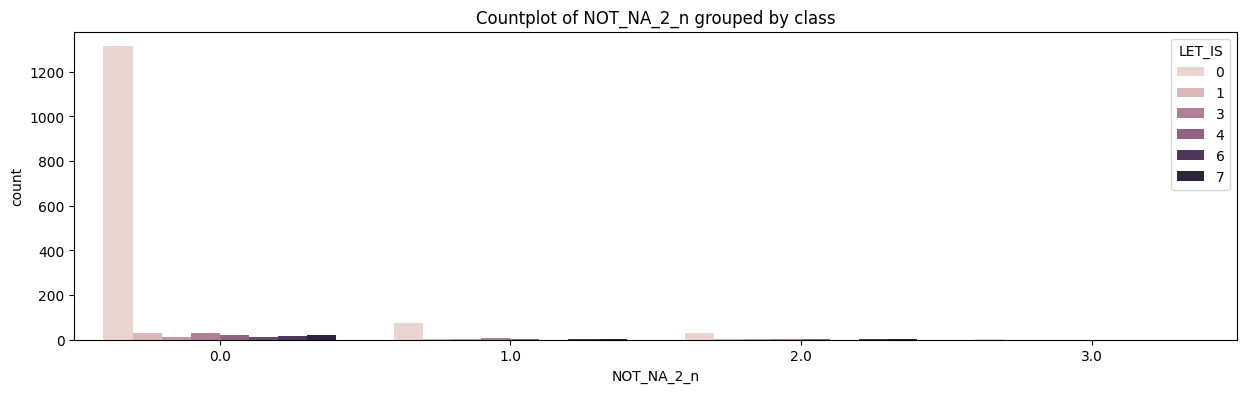

In [87]:
imp = ['NA_R_3_n','NOT_NA_3_n','NOT_NA_2_n']
# вывод диаграмм
for i in imp:
    plt.figure(figsize=(15, 4))
    sns.countplot(x=i, hue='LET_IS', data=data)
    plt.title(f"Countplot of {i} grouped by class")
    plt.show()

## 6. Random Forest на разных наборах данных

In [88]:
l30 = int(0.3 * len(features_df))

# Определяем 30% признаков с наибольшей важностью
top_30_percent_features = features_df['Feature'].head(l30).values

# Определяем 30% признаков с наименьшей важностью
low_30_percent_features = features_df['Feature'].tail(l30).values

# Создаем подмножества данных (если X_train и X_test - DataFrame)
X_train_top = X_train[top_30_percent_features]
X_test_top = X_test[top_30_percent_features]

X_train_low = X_train[low_30_percent_features]
X_test_low = X_test[low_30_percent_features]

### a. На полном наборе показателей

In [89]:
# точность для полного набора
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8921568627450981

### b. На 30% показателей с наибольшими оценками важности

In [90]:
# Обучаем модель на 30% признаков с наибольшей важностью
rf_top = RandomForestClassifier(random_state=42, n_estimators=100)
rf_top.fit(X_train_top, y_train)
y_pred_top = rf_top.predict(X_test_top)
accuracy_top = accuracy_score(y_test, y_pred_top)
accuracy_top

0.8921568627450981

### c. На 30% показателей с наименьшими оценками важности

In [91]:
# Обучаем модель на 30% наименее значимых признаков
rf_low = RandomForestClassifier(random_state=42, n_estimators=100)
rf_low.fit(X_train_low, y_train)
y_pred_low = rf_low.predict(X_test_low)
accuracy_low = accuracy_score(y_test, y_pred_low)
accuracy_low

0.8333333333333334

На полном наборе показателей и на 30% показателей с наибольшими оценками важности точность не меняется, а на 30% показателей с наименьшими оценками важности оценка становится меньше.

## 7. Модель AdaBoost

### a. Построение моделей с разным количеством деревьем

In [92]:
# Базовый классификатор - дерево решений с максимальной глубиной 3
base_estimator = DecisionTreeClassifier(max_depth=3, random_state=42)

# Создаем импуктер для замены NaN на среднее значение по столбцам
imputer = SimpleImputer(strategy='mean')
# Применяем импутер к обучающим и тестовым данным
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Список для хранения точности при разном числе деревьев
n_estimators_range = [10, 50, 100, 150, 200, 250, 300]
accuracies = []

# Обучение моделей AdaBoost с разным числом деревьев
for n in n_estimators_range:
    # Создаем модель AdaBoost с заданным числом деревьев
    ada_clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=n, algorithm='SAMME', random_state=42)
    
    ada_clf.fit(X_train, y_train)       # Обучение модели
    y_pred = ada_clf.predict(X_test)    # Предсказание на тестовой выборке
    
    # Вычисление точности
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    print(f"Accuracy with {n} trees: {accuracy:.4f}")

Accuracy with 10 trees: 0.8804
Accuracy with 50 trees: 0.8863
Accuracy with 100 trees: 0.8765
Accuracy with 150 trees: 0.8784
Accuracy with 200 trees: 0.8804
Accuracy with 250 trees: 0.8765
Accuracy with 300 trees: 0.8765


### b. Визуализация

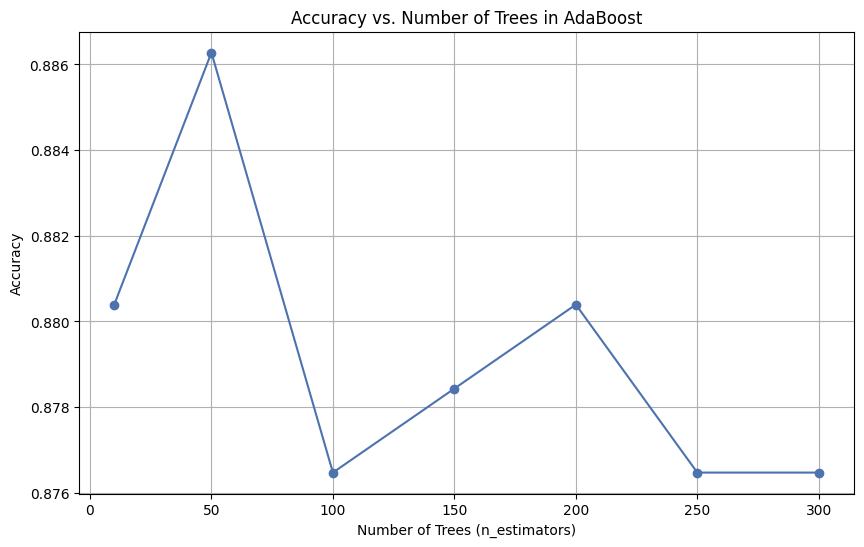

In [93]:
# Построение графика зависимости точности от числа деревьев
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Trees in AdaBoost')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Оптимальное число деревьев, при котором точность модели более высокая, - 50.